In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn

In [2]:
import json

In [3]:
Lost_Columns = [
    'actor_1_facebook_likes',
    'actor_2_facebook_likes',
    'actor_3_facebook_likes',
    'aspect_ratio',
    'cast_total_facebook_likes',
    'color',
    'content_rating',
    'director_facebook_likes',
    'facenumber_in_poster',
    'movie_facebook_likes',
    'movie_imdb_link',
    'num_critic_for_reviews',
    'num_user_for_reviews']

In [4]:
TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES = {
    'budget': 'budget',
    'genres': 'genres',
    'revenue': 'gross',
    'title': 'movie_title',
    'runtime': 'duration',
    'original_language': 'language',
    'keywords': 'plot_keywords',
    'vote_count': 'num_voted_users'}

In [5]:
IMDB_COLUMNS_TO_REMAP = {'imdb_score': 'vote_average'}

In [6]:
Movies = pd.read_csv('tmdb_5000_movies.csv')

In [7]:
Movies['release_date'] = pd.to_datetime(Movies['release_date']).apply(lambda x: x.date())

In [8]:
Json_columns_Movies = ['genres', 'keywords', 'production_countries','production_companies', 'spoken_languages']

In [9]:
for column in Json_columns_Movies:
    Movies[column] = Movies[column].apply(json.loads)

In [10]:
Credits = pd.read_csv('tmdb_5000_credits.csv')

In [11]:
Json_columns_Credits = ['cast','crew']

In [12]:
for column in Json_columns_Credits:
    Credits[column] = Credits[column].apply(json.loads)

In [13]:
Movies.rename(columns=TMDB_TO_IMDB_SIMPLE_EQUIVALENCIES,inplace=True)

In [14]:
Movies['Title_Year'] = Movies['release_date'].apply(lambda x : x.year)

In [15]:
def Extract_Details(data,index):
    try:
        for idx in index:
            data = data[idx]
        return data
    except IndexError or KeyError:
        return pd.np.nan

In [16]:
Movies['Country'] = Movies['production_countries'].apply(lambda x :Extract_Details(x,[0,'name']))

In [17]:
Movies['Country']

0       United States of America
1       United States of America
2                 United Kingdom
3       United States of America
4       United States of America
5       United States of America
6       United States of America
7       United States of America
8                 United Kingdom
9       United States of America
10      United States of America
11                United Kingdom
12                       Jamaica
13      United States of America
14                United Kingdom
15                Czech Republic
16      United States of America
17      United States of America
18      United States of America
19                   New Zealand
20      United States of America
21                United Kingdom
22                   New Zealand
23                United Kingdom
24                   New Zealand
25      United States of America
26      United States of America
27      United States of America
28      United States of America
29                United Kingdom
          

In [18]:
Movies['Language'] = Movies['spoken_languages'].apply(lambda x:Extract_Details(x,[0,'name']))

In [19]:
def Get_Director(crew_data):
    directors = [x['name'] for x in crew_data if x['job']=='Director']
    return Extract_Details(directors,[0])
    

In [20]:
Movies['Director'] = Credits['crew'].apply(Get_Director)

In [21]:
Movies['Director']

0            James Cameron
1           Gore Verbinski
2               Sam Mendes
3        Christopher Nolan
4           Andrew Stanton
5                Sam Raimi
6             Byron Howard
7              Joss Whedon
8              David Yates
9              Zack Snyder
10            Bryan Singer
11            Marc Forster
12          Gore Verbinski
13          Gore Verbinski
14             Zack Snyder
15          Andrew Adamson
16             Joss Whedon
17            Rob Marshall
18        Barry Sonnenfeld
19           Peter Jackson
20               Marc Webb
21            Ridley Scott
22           Peter Jackson
23             Chris Weitz
24           Peter Jackson
25           James Cameron
26           Anthony Russo
27              Peter Berg
28         Colin Trevorrow
29              Sam Mendes
               ...        
4773           Kevin Smith
4774         James Bidgood
4775       Andrew Bujalski
4776           Neil LaBute
4777            Eric Eason
4778              Uwe Boll
4

In [22]:
Movies['Actor_1']= Credits['cast'].apply(lambda x:Extract_Details(x,[1,'name']))

In [23]:
Movies['Actor_2']= Credits['cast'].apply(lambda x:Extract_Details(x,[2,'name']))

In [24]:
Movies['Actor_3']= Credits['cast'].apply(lambda x:Extract_Details(x,[3,'name']))

In [25]:
def preprocess(keywords):
    return '|'.join([x['name'] for x in keywords])

In [26]:
Movies['genres'] = Movies['genres'].apply(preprocess)

In [27]:
Movies['plot_keywords'] = Movies['plot_keywords'].apply(preprocess)

In [28]:
Movies

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,movie_title,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Avatar,7.2,11800,2009.0,United States of America,English,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Spectre,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,The Dark Knight Rises,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,John Carter,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Spider-Man 3,5.9,3576,2007.0,United States of America,English,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|musical|princes...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Tangled,7.4,3330,2010.0,United States of America,English,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,Avengers: Age of Ultron,7.3,6767,2015.0,United States of America,English,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,Harry Potter and the Half-Blood Prince,7.4,5293,2009.0,United Kingdom,English,David Yates,Rupert Grint,Emma Watson,Tom Felton
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,en,Batman v Superman: Dawn of Justice,Fearing the actions of a go

In [29]:
from nltk.corpus import wordnet

In [30]:
from sklearn import linear_model

In [31]:
import math,nltk,warnings

In [33]:
from fuzzywuzzy import fuzz

In [34]:
from sklearn.neighbors import NearestNeighbors

In [35]:
from wordcloud import WordCloud ,STOPWORDS

In [32]:
warnings.filterwarnings('ignore')

In [36]:
stemmer = nltk.stem.PorterStemmer()

In [37]:
Movies_Info = pd.DataFrame(Movies.dtypes).T.rename(index={0:'Column Type'})

In [38]:
Movies_Info = Movies_Info.append(pd.DataFrame(Movies.isnull().sum()).T.rename(index = {0:'Null Values Count'}))

In [39]:
Movies_Info = Movies_Info.append(pd.DataFrame(Movies.isnull().sum()/Movies.shape[0]*100).T.rename(index = {0:'Null Values(%)'}))

In [40]:
Movies_Info

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,movie_title,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3
Column Type,int64,object,object,int64,object,object,object,object,float64,object,...,object,float64,int64,float64,object,object,object,object,object,object
Null Values Count,0,0,3091,0,0,0,0,3,0,0,...,0,0,0,1,174,86,30,53,63,93
Null Values(%),0,0,64.3556,0,0,0,0,0.062461,0,0,...,0,0,0,0.0208203,3.62274,1.79055,0.62461,1.10348,1.31168,1.93629


In [41]:
total_plot_keywords = set()

In [42]:
for list_words in Movies['plot_keywords'].str.split('|'):
    if isinstance(list_words,float):continue
    total_plot_keywords = total_plot_keywords.union(list_words)


total_plot_keywords.remove('')

    

In [43]:
len(total_plot_keywords)

9813

In [45]:
def count_keywords(df,ref_col,total_keywords):
    keywords_count =dict()
    for keyword in total_keywords:
        keywords_count[keyword] =0
    for list_words in df[ref_col].str.split('|'):
        if type(list_words) ==float and pd.isnull(list_words):
            continue
        for word in [word for word in list_words if word in total_keywords]:
            if pd.notnull(word):
                keywords_count[word]+=1
    keyword_occurences=[]
    for k,v in keywords_count.items():
        keyword_occurences.append([k,v])
    keyword_occurences.sort(key= lambda x: x[1],reverse=True)
    return keyword_occurences,keywords_count
        

In [46]:
keyword_plot_occurences,keywords_plot_count= count_keywords(Movies,'plot_keywords',total_plot_keywords)

In [47]:
len(keyword_plot_occurences)

9813

In [48]:
def color_function(word=None,font_size = None,position=None,orientation= None,font_path = None,random_state=None):
    h = int(360*tone/255.0)
    s = int(100.0*255.0/255.0)
    l = int(100.0* float(random_state.randint(70,120))/255.0)
    return "hsl({}, {}%, {}%)".format(h, s, l)

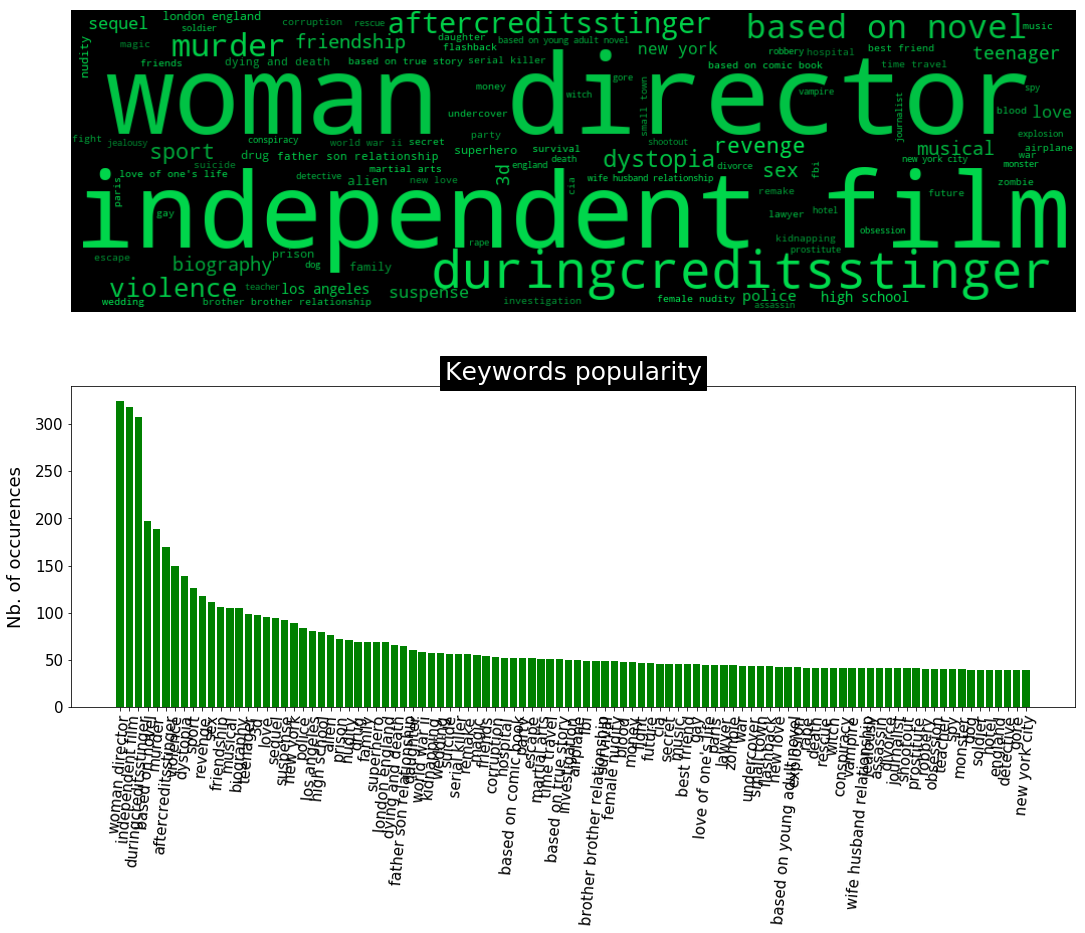

In [51]:
fig = plt.figure(1, figsize=(18,13))
ax1 = fig.add_subplot(2,1,1)
words = dict()
keyword_occurences_sample = keyword_plot_occurences[:100]
for word in keyword_occurences_sample:
    words[word[0]] = word[1]
tone =100
wordcloud = WordCloud(width=1000,height=300, background_color='black',max_words=1628,relative_scaling=1,color_func = color_function,normalize_plurals=False)
wordcloud.generate_from_frequencies(words)
ax1.imshow(wordcloud,interpolation='bilinear')
ax1.axis('off')


ax2 = fig.add_subplot(2,1,2)
y = [i[1] for i in keyword_occurences_sample]
x = [k for k,i in enumerate(keyword_occurences_sample)]
x_label = [i[0] for i in keyword_occurences_sample]
plt.xticks(rotation=85, fontsize = 15)
plt.yticks(fontsize = 15)
plt.xticks(x, x_label)
plt.ylabel("Nb. of occurences", fontsize = 18, labelpad = 10)
ax2.bar(x, y, align = 'center', color='g')
plt.title("Keywords popularity",bbox={'facecolor':'k', 'pad':5},color='w',fontsize = 25)
plt.show()

In [52]:
missing_df = Movies.isnull().sum(axis=0).reset_index()
missing_df.columns = ['Column Name','Missing Count']
missing_df['Filling Factor'] = (Movies.shape[0]- missing_df['Missing Count'])/Movies.shape[0]*100
missing_df.sort_values('Filling Factor').reset_index(drop = True)

,Column Name,Missing Count,Filling Factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,Country,174,96.377264
3,Actor_3,93,98.063710
4,Language,86,98.209452
5,Actor_2,63,98.688320
6,Actor_1,53,98.896523
7,Director,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359


In [53]:
Movies['Decade'] = Movies['Title_Year'].apply(lambda x: ((x-1900)//10)*10)

In [54]:
Movies['Decade']

0       100.0
1       100.0
2       110.0
3       110.0
4       110.0
5       100.0
6       110.0
7       110.0
8       100.0
9       110.0
10      100.0
11      100.0
12      100.0
13      110.0
14      110.0
15      100.0
16      110.0
17      110.0
18      110.0
19      110.0
20      110.0
21      110.0
22      110.0
23      100.0
24      100.0
25       90.0
26      110.0
27      110.0
28      110.0
29      110.0
        ...  
4773     90.0
4774     70.0
4775    100.0
4776     90.0
4777    100.0
4778    100.0
4779     90.0
4780    110.0
4781    110.0
4782    100.0
4783    110.0
4784    100.0
4785    110.0
4786    100.0
4787    110.0
4788     70.0
4789    100.0
4790    100.0
4791    100.0
4792     90.0
4793    100.0
4794    110.0
4795     90.0
4796    100.0
4797    100.0
4798     90.0
4799    110.0
4800    110.0
4801    110.0
4802    100.0
Name: Decade, Length: 4803, dtype: float64

In [56]:
def Extract_Statistical_data(group_object):
    return {'Min':group_object.min(),'Max':group_object.max(),'Count':group_object.count(),'Mean':group_object.mean()}

In [57]:
test = Movies['Title_Year'].groupby(Movies['Decade']).apply(Extract_Statistical_data)

In [58]:
test

Decade       
10.0    Count       1.000000
        Max      1916.000000
        Mean     1916.000000
        Min      1916.000000
20.0    Count       4.000000
        Max      1929.000000
        Mean     1927.500000
        Min      1925.000000
30.0    Count      15.000000
        Max      1939.000000
        Mean     1935.733333
        Min      1930.000000
40.0    Count      25.000000
        Max      1949.000000
        Mean     1944.560000
        Min      1940.000000
50.0    Count      27.000000
        Max      1959.000000
        Mean     1954.296296
        Min      1950.000000
60.0    Count      71.000000
        Max      1969.000000
        Mean     1965.028169
        Min      1960.000000
70.0    Count     109.000000
        Max      1979.000000
        Mean     1974.944954
        Min      1970.000000
80.0    Count     278.000000
        Max      1989.000000
        Mean     1984.715827
        Min      1980.000000
90.0    Count     778.000000
        Max      1999.000000


In [59]:
test = test.unstack()

In [60]:
test

,Count,Max,Mean,Min
Decade,,,,
10.0,1.0,1916.0,1916.000000,1916.0
20.0,4.0,1929.0,1927.500000,1925.0
30.0,15.0,1939.0,1935.733333,1930.0
40.0,25.0,1949.0,1944.560000,1940.0
50.0,27.0,1959.0,1954.296296,1950.0
60.0,71.0,1969.0,1965.028169,1960.0
70.0,109.0,1979.0,1974.944954,1970.0
80.0,278.0,1989.0,1984.715827,1980.0
90.0,778.0,1999.0,1996.141388,1990.0


In [61]:
total_genres_keywords = set()

In [63]:
for keyword in Movies['genres'].str.split('|').values:
    total_genres_keywords = total_genres_keywords.union(keyword)

In [64]:
total_genres_keywords

{'',
 'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [65]:
total_genres_keywords.remove('')

In [66]:
total_genres_keywords

{'Action',
 'Adventure',
 'Animation',
 'Comedy',
 'Crime',
 'Documentary',
 'Drama',
 'Family',
 'Fantasy',
 'Foreign',
 'History',
 'Horror',
 'Music',
 'Mystery',
 'Romance',
 'Science Fiction',
 'TV Movie',
 'Thriller',
 'War',
 'Western'}

In [67]:
genres_keyword_occurences,count = count_keywords(Movies,'genres',total_genres_keywords)

In [68]:
genres_keyword_occurences[:5]

[['Drama', 2297],
 ['Comedy', 1722],
 ['Thriller', 1274],
 ['Action', 1154],
 ['Romance', 894]]

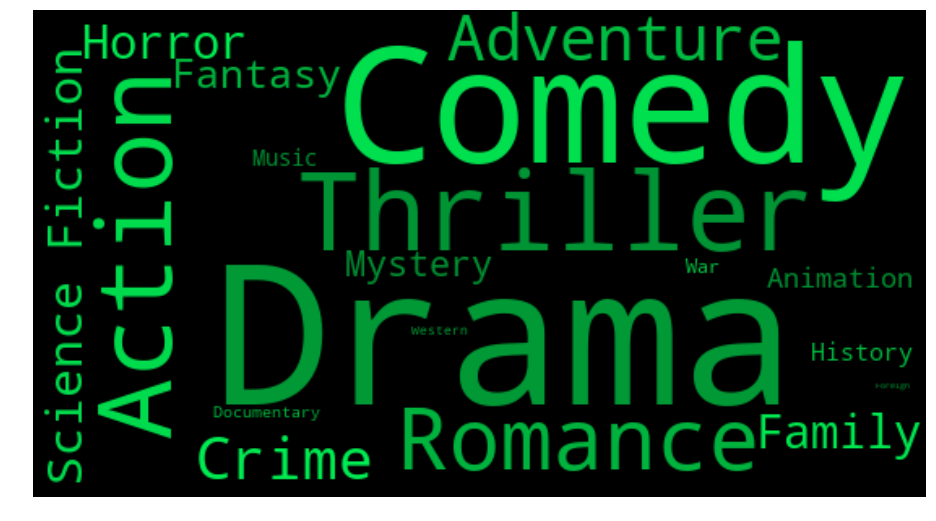

In [69]:
genre_keywords_sample = genres_keyword_occurences[:100]
words = dict()
for word in genre_keywords_sample:
    words[word[0]] = word[1]
tone =100
fig,ax = plt.subplots(figsize =(16,10))
wordcloud_genres = WordCloud(width=550,height=300, background_color='black', 
                      max_words=1628,relative_scaling=0.7,
                      color_func = color_function,
                      normalize_plurals=False)
wordcloud_genres.generate_from_frequencies(words)
plt.imshow(wordcloud_genres,interpolation='bilinear')
plt.axis('off')
plt.show()

In [70]:
Movies_df_for_cleaning = Movies

In [71]:
stemmer = nltk.stem.PorterStemmer()

In [72]:
Plot_keywords_Root = dict()

In [73]:
Plot_keywords_Select = dict()

In [74]:
Plot_category_Keys = []

In [76]:
for plot_keywords_list in Movies_df_for_cleaning['plot_keywords']:
    if pd.isnull(plot_keywords_list):
        continue
    for plot_keyword in plot_keywords_list.split('|'):
        plot_keyword = plot_keyword.lower()
        stemmed_plot_keyword = stemmer.stem(plot_keyword)
        if stemmed_plot_keyword in Plot_keywords_Root:
            Plot_keywords_Root[stemmed_plot_keyword].add(plot_keyword)
        else:
            Plot_keywords_Root[stemmed_plot_keyword] ={plot_keyword}


In [77]:
Plot_keywords_Root

{'culture clash': {'culture clash'},
 'futur': {'future'},
 'space war': {'space war'},
 'space coloni': {'space colony'},
 'societi': {'society'},
 'space travel': {'space travel'},
 'futurist': {'futuristic'},
 'romanc': {'romance'},
 'space': {'space'},
 'alien': {'alien', 'alienation'},
 'tribe': {'tribe'},
 'alien planet': {'alien planet'},
 'cgi': {'cgi'},
 'marin': {'marine'},
 'soldier': {'soldier'},
 'battl': {'battle'},
 'love affair': {'love affair'},
 'anti war': {'anti war'},
 'power rel': {'power relations'},
 'mind and soul': {'mind and soul'},
 '3d': {'3d'},
 'ocean': {'ocean'},
 'drug abus': {'drug abuse'},
 'exotic island': {'exotic island'},
 'east india trading compani': {'east india trading company'},
 "love of one's lif": {"love of one's life"},
 'traitor': {'traitor'},
 'shipwreck': {'shipwreck'},
 'strong woman': {'strong woman'},
 'ship': {'ship'},
 'allianc': {'alliance'},
 'calypso': {'calypso'},
 'afterlif': {'afterlife'},
 'fighter': {'fighter'},
 'pirat': 

In [78]:
for stemmed__plot_keyword in Plot_keywords_Root.keys():
    if len(Plot_keywords_Root[stemmed__plot_keyword])>1:
        min_length=1000
        for plot__keyword in Plot_keywords_Root[stemmed__plot_keyword]:
            if len(plot__keyword) < min_length:
                plot__keyword_dummy = plot__keyword
                min_length = len(plot__keyword)
        Plot_category_Keys.append(plot__keyword_dummy)
        Plot_keywords_Select[stemmed__plot_keyword]= plot__keyword_dummy
    else:
        Plot_category_Keys.append(list(Plot_keywords_Root[stemmed__plot_keyword])[0])
        Plot_keywords_Select[stemmed__plot_keyword] = list(Plot_keywords_Root[stemmed__plot_keyword])[0]

In [79]:
Plot_keywords_Root

{'culture clash': {'culture clash'},
 'futur': {'future'},
 'space war': {'space war'},
 'space coloni': {'space colony'},
 'societi': {'society'},
 'space travel': {'space travel'},
 'futurist': {'futuristic'},
 'romanc': {'romance'},
 'space': {'space'},
 'alien': {'alien', 'alienation'},
 'tribe': {'tribe'},
 'alien planet': {'alien planet'},
 'cgi': {'cgi'},
 'marin': {'marine'},
 'soldier': {'soldier'},
 'battl': {'battle'},
 'love affair': {'love affair'},
 'anti war': {'anti war'},
 'power rel': {'power relations'},
 'mind and soul': {'mind and soul'},
 '3d': {'3d'},
 'ocean': {'ocean'},
 'drug abus': {'drug abuse'},
 'exotic island': {'exotic island'},
 'east india trading compani': {'east india trading company'},
 "love of one's lif": {"love of one's life"},
 'traitor': {'traitor'},
 'shipwreck': {'shipwreck'},
 'strong woman': {'strong woman'},
 'ship': {'ship'},
 'allianc': {'alliance'},
 'calypso': {'calypso'},
 'afterlif': {'afterlife'},
 'fighter': {'fighter'},
 'pirat': 

In [80]:
Plot_keywords_Select

{'culture clash': 'culture clash',
 'futur': 'future',
 'space war': 'space war',
 'space coloni': 'space colony',
 'societi': 'society',
 'space travel': 'space travel',
 'futurist': 'futuristic',
 'romanc': 'romance',
 'space': 'space',
 'alien': 'alien',
 'tribe': 'tribe',
 'alien planet': 'alien planet',
 'cgi': 'cgi',
 'marin': 'marine',
 'soldier': 'soldier',
 'battl': 'battle',
 'love affair': 'love affair',
 'anti war': 'anti war',
 'power rel': 'power relations',
 'mind and soul': 'mind and soul',
 '3d': '3d',
 'ocean': 'ocean',
 'drug abus': 'drug abuse',
 'exotic island': 'exotic island',
 'east india trading compani': 'east india trading company',
 "love of one's lif": "love of one's life",
 'traitor': 'traitor',
 'shipwreck': 'shipwreck',
 'strong woman': 'strong woman',
 'ship': 'ship',
 'allianc': 'alliance',
 'calypso': 'calypso',
 'afterlif': 'afterlife',
 'fighter': 'fighter',
 'pirat': 'pirate',
 'swashbuckl': 'swashbuckler',
 'aftercreditssting': 'aftercreditsstinge

In [81]:
Plot_category_Keys

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 'ocean',
 'drug abuse',
 'exotic island',
 'east india trading company',
 "love of one's life",
 'traitor',
 'shipwreck',
 'strong woman',
 'ship',
 'alliance',
 'calypso',
 'afterlife',
 'fighter',
 'pirate',
 'swashbuckler',
 'aftercreditsstinger',
 'spy',
 'based on novel',
 'secret agent',
 'sequel',
 'mi6',
 'british secret service',
 'united kingdom',
 'dc comics',
 'crime fighter',
 'terrorist',
 'secret identity',
 'burglar',
 'hostage drama',
 'time bomb',
 'gotham city',
 'vigilante',
 'cover-up',
 'superhero',
 'villainess',
 'tragic hero',
 'terror',
 'destruction',
 'catwoman',
 'cat burglar',
 'imax',
 'flood',
 'criminal underworld',
 'batman',
 'mars',
 'medallion',
 'princess',
 'steampunk',
 '

In [82]:
len(Plot_category_Keys)

9474

In [83]:
count =0
for stemmed_plot_words in Plot_keywords_Root.keys():
    if len(Plot_keywords_Root[stemmed_plot_words])>1:
        count+=1
        if count<15:
            print(count,Plot_keywords_Root[stemmed_plot_words],len(Plot_keywords_Root[stemmed_plot_words]))

1 {'alienation', 'alien'} 2
2 {'spy', 'spying'} 2
3 {'vigilante', 'vigilantism'} 2
4 {'terrorism', 'terror'} 2
5 {'flood', 'flooding'} 2
6 {'spider', 'spiders'} 2
7 {'horse', 'horses'} 2
8 {'musical', 'music'} 2
9 {'animation', 'anime', 'animal'} 3
10 {'compassion', 'compass'} 2
11 {'training', 'train'} 2
12 {'sail', 'sailing'} 2
13 {'time travel', 'time traveler'} 2
14 {'orc', 'orcs'} 2


In [87]:
def Replacement_DF_plot_keywords(df,ref_col,roots=False):
    df_new = df.copy(deep = True)
    for index,row in df_new.iterrows():
        plot_keywords_list = row['plot_keywords']
        if pd.isnull(plot_keywords_list):
            continue
        row_list = []
        for plot_word in plot_keywords_list.split('|'):
            stemmed_plot_word = stemmer.stem(plot_word) if roots else plot_word
            if stemmed_plot_word in ref_col.keys():
                row_list.append(ref_col[stemmed_plot_word])
            else:
                row_list.append(stemmed_plot_word)
        df_new.set_value(index,'plot_keywords','|'.join(row_list))
    return df_new
            
            

In [88]:
Plot_Keywords_Cleaned_DF = Replacement_DF_plot_keywords(Movies_df_for_cleaning,Plot_keywords_Select,roots = True)

In [89]:
Plot_Keywords_Cleaned_DF

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3,Decade
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,7.2,11800,2009.0,United States of America,English,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang,100.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård,100.0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes,110.0
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway,110.0
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe,110.0
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,5.9,3576,2007.0,United States of America,English,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church,100.0
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|music|princess|...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,7.4,3330,2010.0,United States of America,English,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman,110.0
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,7.3,6767,2015.0,United States of America,English,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans,110.0
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,7.4,5293,2009.0,United Kingdom,English,David Yates,Rupert Grint,Emma Watson,Tom Felton,100.0
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{'name': 'DC Comics', 'id': 429}, {'name': 'A...",...,5.7,7004,2016.0,United States of Am

In [90]:
Movies

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3,Decade
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space war|space colony|so...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,7.2,11800,2009.0,United States of America,English,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang,100.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård,100.0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|mi6|bri...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes,110.0
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway,110.0
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe,110.0
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,5.9,3576,2007.0,United States of America,English,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church,100.0
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|musical|princes...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,7.4,3330,2010.0,United States of America,English,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman,110.0
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,7.3,6767,2015.0,United States of America,English,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans,110.0
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,7.4,5293,2009.0,United Kingdom,English,David Yates,Rupert Grint,Emma Watson,Tom Felton,100.0
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{'name': 'DC Comics', 'id': 429}, {'name': 'A...",...,5.7,7004,2016.0,United States of Am

In [91]:
Plot_category_Keys

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 'ocean',
 'drug abuse',
 'exotic island',
 'east india trading company',
 "love of one's life",
 'traitor',
 'shipwreck',
 'strong woman',
 'ship',
 'alliance',
 'calypso',
 'afterlife',
 'fighter',
 'pirate',
 'swashbuckler',
 'aftercreditsstinger',
 'spy',
 'based on novel',
 'secret agent',
 'sequel',
 'mi6',
 'british secret service',
 'united kingdom',
 'dc comics',
 'crime fighter',
 'terrorist',
 'secret identity',
 'burglar',
 'hostage drama',
 'time bomb',
 'gotham city',
 'vigilante',
 'cover-up',
 'superhero',
 'villainess',
 'tragic hero',
 'terror',
 'destruction',
 'catwoman',
 'cat burglar',
 'imax',
 'flood',
 'criminal underworld',
 'batman',
 'mars',
 'medallion',
 'princess',
 'steampunk',
 '

In [92]:
Keywords = Plot_category_Keys

In [93]:
Keywords.remove('')

In [94]:
Keywords

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 'ocean',
 'drug abuse',
 'exotic island',
 'east india trading company',
 "love of one's life",
 'traitor',
 'shipwreck',
 'strong woman',
 'ship',
 'alliance',
 'calypso',
 'afterlife',
 'fighter',
 'pirate',
 'swashbuckler',
 'aftercreditsstinger',
 'spy',
 'based on novel',
 'secret agent',
 'sequel',
 'mi6',
 'british secret service',
 'united kingdom',
 'dc comics',
 'crime fighter',
 'terrorist',
 'secret identity',
 'burglar',
 'hostage drama',
 'time bomb',
 'gotham city',
 'vigilante',
 'cover-up',
 'superhero',
 'villainess',
 'tragic hero',
 'terror',
 'destruction',
 'catwoman',
 'cat burglar',
 'imax',
 'flood',
 'criminal underworld',
 'batman',
 'mars',
 'medallion',
 'princess',
 'steampunk',
 '

In [95]:
Plot_Keyword_Occurences,Keyword_Count = count_keywords(Plot_Keywords_Cleaned_DF,'plot_keywords',Keywords)

In [96]:
Plot_Keyword_Occurences[:10]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 197],
 ['aftercreditsstinger', 170],
 ['music', 151],
 ['violence', 150],
 ['dystopia', 139],
 ['sport', 126]]

In [108]:
def Get_Synonyms(word):
    lemma = set()
    for synonyms in wordnet.synsets(word):
        for syn in synonyms.lemma_names():
            index = synonyms.name().find('.')+1
            if synonyms.name()[index] == 'n':
                lemma.add(syn.lower().replace('_',' '))
    return lemma

In [109]:
import nltk
nltk.download('wordnet')
test = Get_Synonyms('outlander')

[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\724437\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!


In [110]:
test

{'alien', 'foreigner', 'noncitizen', 'outlander'}

In [111]:
def test_keyword(word,key_count,threshold):
    return (False,True)[key_count.get(word,0) >= threshold]

In [112]:
Plot_Keyword_Occurences

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 197],
 ['aftercreditsstinger', 170],
 ['music', 151],
 ['violence', 150],
 ['dystopia', 139],
 ['sport', 126],
 ['revenge', 118],
 ['sex', 111],
 ['friendship', 106],
 ['biography', 105],
 ['teenager', 99],
 ['3d', 98],
 ['love', 95],
 ['sequel', 94],
 ['suspense', 93],
 ['new york', 89],
 ['prison', 87],
 ['police', 84],
 ['alcohol', 82],
 ['los angeles', 81],
 ['alien', 80],
 ['high school', 80],
 ['drug', 72],
 ['nudity', 71],
 ['assassin', 70],
 ['superhero', 69],
 ['family', 69],
 ['london england', 69],
 ['dying and death', 66],
 ['father son relationship', 65],
 ['daughter', 61],
 ['friend', 59],
 ['suicide', 59],
 ['world war ii', 58],
 ['kidnapping', 57],
 ['wedding', 57],
 ['serial kiler', 57],
 ['remake', 56],
 ['magic', 55],
 ['explosive', 55],
 ['fight', 54],
 ['time travel', 53],
 ['corruption', 53],
 ['party', 53],
 ['escape', 52],
 ['based on comic

In [114]:
Plot_Keyword_Occurences.sort(key = lambda x :x[1], reverse=False)
key_count =dict()

In [115]:
for item in Plot_Keyword_Occurences:
    key_count[item[0]] = item[1]

In [116]:
key_count

{'γη': 0,
 'cat burglar': 1,
 'edgar rice burroughs': 1,
 'mars civilization': 1,
 'egomania': 1,
 'sand': 1,
 'narcism': 1,
 'blonde woman': 1,
 'healing power': 1,
 'healing gift': 1,
 'apparition': 1,
 'clark kent': 1,
 'bruce wayne': 1,
 'lex luthor': 1,
 'comanche': 1,
 'tonto': 1,
 'changing history': 1,
 'scientific experiment': 1,
 'sherwood forest': 1,
 'rich woman - poor man': 1,
 'steerage': 1,
 'salvage': 1,
 'mind reading': 1,
 'naval': 1,
 'armada': 1,
 'battleship': 1,
 'naval combat': 1,
 'jds myoko': 1,
 'lost communication': 1,
 'buoy': 1,
 'communications expert': 1,
 'joint chiefs of staff': 1,
 'jet fighter pilot': 1,
 'navy lieutenant': 1,
 'permission to marry': 1,
 'uss john paul jones': 1,
 'mighty mo': 1,
 'uss missouri': 1,
 'istanbul turkey': 1,
 'macao': 1,
 'mandarin': 1,
 'war machine': 1,
 'iron patriot': 1,
 'extremis': 1,
 'scary': 1,
 'transforming robot': 1,
 'electricity': 1,
 'neon light': 1,
 'autocracy': 1,
 'protector': 1,
 'barbie': 1,
 'day ca

In [117]:
high_frequency_words_dict = dict()

In [120]:
count=0
remplacement_mot = dict()
icount = 0
for index, [mot, nb_apparitions] in enumerate(Plot_Keyword_Occurences):
    if nb_apparitions > 5: continue  # only the keywords that appear less than 5 times
    lemma = Get_Synonyms(mot)
    if len(lemma) == 0: continue     # case of the plurals
    #_________________________________________________________________
    liste_mots = [(s, key_count[s]) for s in lemma 
                  if test_keyword(s, key_count, key_count[mot])]
    liste_mots.sort(key = lambda x:(x[1],x[0]), reverse = True)    
    if len(liste_mots) <= 1: continue       # no replacement
    if mot == liste_mots[0][0]: continue    # replacement by himself
    icount += 1
    if  icount < 8:
        print('{:<12} -> {:<12} (init: {})'.format(mot, liste_mots[0][0], liste_mots))    
    remplacement_mot[mot] = liste_mots[0][0]

print(90*'_'+'\n'+'The replacement concerns {}% of the keywords.'
      .format(round(len(remplacement_mot)/len(Keywords)*100,2)))

narcism      -> narcissism   (init: [('narcissism', 1), ('narcism', 1)])
apparition   -> shadow       (init: [('shadow', 3), ('phantom', 3), ('apparition', 1)])
macao        -> macau        (init: [('macau', 1), ('macao', 1)])
regent       -> trustee      (init: [('trustee', 1), ('regent', 1)])
civilization -> culture      (init: [('culture', 2), ('civilization', 1)])
ark          -> ark of the covenant (init: [('ark of the covenant', 2), ('ark', 1)])
automaton    -> zombie       (init: [('zombie', 45), ('robot', 27), ('automaton', 1)])
__________________________________________________________________________________________
The replacement concerns 5.97% of the keywords.


In [124]:
for index, [mot, nb_apparitions] in enumerate(Plot_Keyword_Occurences):
    if nb_apparitions > 5: continue 
    print(mot)

γη
cat burglar
edgar rice burroughs
mars civilization
egomania
sand
narcism
blonde woman
healing power
healing gift
apparition
clark kent
bruce wayne
lex luthor
comanche
tonto
changing history
scientific experiment
sherwood forest
rich woman - poor man
steerage
salvage
mind reading
naval
armada
battleship
naval combat
jds myoko
lost communication
buoy
communications expert
joint chiefs of staff
jet fighter pilot
navy lieutenant
permission to marry
uss john paul jones
mighty mo
uss missouri
istanbul turkey
macao
mandarin
war machine
iron patriot
extremis
scary
transforming robot
electricity
neon light
autocracy
protector
barbie
day care
toy story
muscle car
multiple perspectives
terrorist bombing
regent
word domination
refrigerator
scot
peace offering
civilization
mayan
ark
solar
destruction  of mankind
tarzan
beaver
world domination
floating in the air
exploring
counter terrorism
agent coulson
automaton
shared universe
baustelle
noah's ark
exoskeleton
unicorn
eternal youth
literary ada

ridicule
lawn mower
deserted by husband
wookie
jedi master
jedi training
droid
hangar
loose cannon
bust
reference to skittles
black cop
badge
omen
airplane accident
dirty tricks
presidential campaign
endorsement
campaign speech
presidential debate
flask
corps
feminism
transhumanism
singularity
truck driver
cb radio
spanish
banana boat
bone marrow transplant
beaten to death
head bashed in
violent death
bloody fight
altar
magnet beam
jam
speed of light
post world war i
missing in action
missing son
gallipoli campaign
money transfer
pottery
screwball comedy
frisbee
troubadour
intellectual disability
aerobics
tween girl
publicist
nature documentary
virility
demonstration
hunger strike
morning prayer
conference
nonviolent resistance
independence movement
bombay india
calcutta
pro bono
new baby
learning
coffee shop manager
pizza hut
locked door
commuter train
snorkel
whistle
director cameo
sweet sixteen
self mocking
character is subject of comic
reference to prince valiant
monkey actor
view 

dead teenager
goth girls
graffiti
street art
vernissage
late coming of age
experimental surgery
abduction
sushi restaurant
south hypnosis
spitting blood
body mutilation
extreme sadism
child killer
sawed off shotgun
intestines
shot repeatedly
essex
bachelorette party
bitch
billion dollars
fake commercial
curious
septic tank
welding
trance
infra red
dealer
horror comedy
cage fighting
beefcake
martial arts training
special ops
lamborghini
air guitar
genital mutilation
missing father
long lost relative
dowager
bound and gagged
circular saw
spats
all girl band
st. valentine's day massacre
sugar
dressing
crow
imaginary land
sepia color
father-in-law daughter-in-law relationship
beekeeper
orlando florida
stallion
mission clinic
polynesia
bar brawl
navy veterans
tiki culture
calamity
marching band
interrupted hanging
western town
western spoof
frontier town
looking at the camera
saloon girl
movie reality crossover
nietzsche
coot
female singer
lifestyle
extremsport
morning
talkie
diction coach


nuclear power plant
cia agent
tomboy
buddy
disco
coast guard
julius caesar
normandy
american flag
street race
advertising executive
speech
mourning
spaceman
man child
wallet
heterosexual
vampire slayer
female vampire
colorado
lottery
child labour
female assassin
death of wife
hiking
nose
belgium
overweight man
stagecoach
death row
awkwardness
search party
wife murder
multiple identities
gang rape
videotape
reality show
kindergarten
caper
tv news
worker
assignment
yoga
big family
runner
career woman
kangaroo
stuffed animal
body exchange
informant
leukemia
business start-up
medium
chauffeur
head injury
flamethrower
disembowelment
nation
rugby
thriller
homicide detective
plot twist
cello
niece
voice
warlock
tv star
television producer
freedom fighter
western
pact with the devil
crooked lawyer
temptation
ethics
shrimp
supernatural ability
mysterious past
battle for power
homeless
employee
movie studio
night vision goggles
shaolin
rottweiler
teenage daughter
manhunt
freak
championship
missi

In [125]:
Plot_Keyword_Occurences

[['γη', 0],
 ['cat burglar', 1],
 ['edgar rice burroughs', 1],
 ['mars civilization', 1],
 ['egomania', 1],
 ['sand', 1],
 ['narcism', 1],
 ['blonde woman', 1],
 ['healing power', 1],
 ['healing gift', 1],
 ['apparition', 1],
 ['clark kent', 1],
 ['bruce wayne', 1],
 ['lex luthor', 1],
 ['comanche', 1],
 ['tonto', 1],
 ['changing history', 1],
 ['scientific experiment', 1],
 ['sherwood forest', 1],
 ['rich woman - poor man', 1],
 ['steerage', 1],
 ['salvage', 1],
 ['mind reading', 1],
 ['naval', 1],
 ['armada', 1],
 ['battleship', 1],
 ['naval combat', 1],
 ['jds myoko', 1],
 ['lost communication', 1],
 ['buoy', 1],
 ['communications expert', 1],
 ['joint chiefs of staff', 1],
 ['jet fighter pilot', 1],
 ['navy lieutenant', 1],
 ['permission to marry', 1],
 ['uss john paul jones', 1],
 ['mighty mo', 1],
 ['uss missouri', 1],
 ['istanbul turkey', 1],
 ['macao', 1],
 ['mandarin', 1],
 ['war machine', 1],
 ['iron patriot', 1],
 ['extremis', 1],
 ['scary', 1],
 ['transforming robot', 1],
 

In [129]:
Get_Synonyms('narcism')

{'narcism', 'narcissism', 'self-love'}

In [131]:
len(remplacement_mot)

566

In [132]:
print('Keywords that appear both in keys and values:'.upper()+'\n'+45*'-')
icount = 0
for s in remplacement_mot.values():
    if s in remplacement_mot.keys():
        icount += 1
        if icount < 10: print('{:<20} -> {:<20}'.format(s, remplacement_mot[s]))

for key, value in remplacement_mot.items():
    if value in remplacement_mot.keys():
        remplacement_mot[key] = remplacement_mot[value]  

KEYWORDS THAT APPEAR BOTH IN KEYS AND VALUES:
---------------------------------------------
shadow               -> dark                
failure              -> loser               
leech                -> parasite            
carnival             -> circus              
pit                  -> hell                
drawing              -> lottery             
deal                 -> mountain            
twist                -> crook               
pest                 -> plague              


In [133]:
df_keywords_synonyms = Replacement_DF_plot_keywords(Plot_Keywords_Cleaned_DF,remplacement_mot,roots=False)

In [134]:
def keywords_inventory(dataframe, colonne = 'plot_keywords'):
    PS = nltk.stem.PorterStemmer()
    keywords_roots  = dict()  # collect the words / root
    keywords_select = dict()  # association: root <-> keyword
    category_keys = []
    icount = 0
    for s in dataframe[colonne]:
        if pd.isnull(s): continue
        for t in s.split('|'):
            t = t.lower() ; racine = PS.stem(t)
            if racine in keywords_roots:                
                keywords_roots[racine].add(t)
            else:
                keywords_roots[racine] = {t}
    
    for s in keywords_roots.keys():
        if len(keywords_roots[s]) > 1:  
            min_length = 1000
            for k in keywords_roots[s]:
                if len(k) < min_length:
                    clef = k ; min_length = len(k)            
            category_keys.append(clef)
            keywords_select[s] = clef
        else:
            category_keys.append(list(keywords_roots[s])[0])
            keywords_select[s] = list(keywords_roots[s])[0]
                   
    print("Nb of keywords in variable '{}': {}".format(colonne,len(category_keys)))
    return category_keys, keywords_roots, keywords_select

In [136]:
keywords,keywords_root,keywords_select = keywords_inventory(df_keywords_synonyms,colonne='plot_keywords')

Nb of keywords in variable 'plot_keywords': 8909


In [137]:
keywords

['culture clash',
 'future',
 'space war',
 'space colony',
 'society',
 'space travel',
 'futuristic',
 'romance',
 'space',
 'alien',
 'tribe',
 'alien planet',
 'cgi',
 'marine',
 'soldier',
 'battle',
 'love affair',
 'anti war',
 'power relations',
 'mind and soul',
 '3d',
 'ocean',
 'drug abuse',
 'exotic island',
 'east india trading company',
 "love of one's life",
 'traitor',
 'shipwreck',
 'strong woman',
 'ship',
 'alliance',
 'calypso',
 'afterlife',
 'fighter',
 'pirate',
 'swashbuckler',
 'aftercreditsstinger',
 'spy',
 'based on novel',
 'secret agent',
 'sequel',
 'mi6',
 'british secret service',
 'united kingdom',
 'dc comics',
 'crime fighter',
 'terrorist',
 'secret identity',
 'burglar',
 'hostage drama',
 'time bomb',
 'gotham city',
 'vigilante',
 'cover-up',
 'superhero',
 'villainess',
 'tragic hero',
 'terror',
 'death',
 'catwoman',
 'cat burglar',
 'imax',
 'flood',
 'criminal underworld',
 'batman',
 'mars',
 'medallion',
 'princess',
 'steampunk',
 'martia

In [138]:
keywords.remove('')

In [139]:
new_keyword_occurences,keywords_count = count_keywords(df_keywords_synonyms,'plot_keywords',keywords)

In [140]:
new_keyword_occurences

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 197],
 ['aftercreditsstinger', 170],
 ['music', 151],
 ['violence', 150],
 ['dystopia', 139],
 ['sport', 128],
 ['revenge', 118],
 ['sex', 112],
 ['friendship', 106],
 ['biography', 106],
 ['teenager', 99],
 ['3d', 98],
 ['love', 95],
 ['sequel', 94],
 ['suspense', 93],
 ['new york', 89],
 ['prison', 87],
 ['alien', 84],
 ['police', 84],
 ['alcohol', 82],
 ['los angeles', 81],
 ['high school', 81],
 ['family', 77],
 ['drug', 72],
 ['nudity', 71],
 ['assassin', 70],
 ['superhero', 69],
 ['london england', 69],
 ['dying and death', 66],
 ['daughter', 65],
 ['father son relationship', 65],
 ['friend', 61],
 ['suicide', 61],
 ['magic', 60],
 ['world war ii', 58],
 ['escape', 57],
 ['kidnapping', 57],
 ['wedding', 57],
 ['serial kiler', 57],
 ['remake', 56],
 ['corruption', 55],
 ['fight', 55],
 ['explosive', 55],
 ['death', 53],
 ['time travel', 53],
 ['party', 53],
 

In [141]:
def replacement_df_low_frequency_keywords(df, keyword_occurences):
    df_new = df.copy(deep = True)
    key_count = dict()
    for s in keyword_occurences:
        key_count[s[0]] = s[1]
    
    for index, row in df_new.iterrows():
        chaine = row['plot_keywords']
        if pd.isnull(chaine): continue
        nouvelle_liste = []
        for s in chaine.split('|'): 
            if key_count.get(s, 4) > 3: nouvelle_liste.append(s)
        df_new.set_value(index, 'plot_keywords', '|'.join(nouvelle_liste))
    return df_new

In [142]:
df_keywords_occurence = \
    replacement_df_low_frequency_keywords(df_keywords_synonyms, new_keyword_occurences)
keywords, keywords_roots, keywords_select = \
    keywords_inventory(df_keywords_occurence, colonne = 'plot_keywords')

Nb of keywords in variable 'plot_keywords': 2121


In [143]:
keywords.remove('')

In [144]:
new_keyword_occurences, keywords_count = count_keywords(df_keywords_occurence,
                                                    'plot_keywords',keywords)

In [145]:
new_keyword_occurences[:10]

[['woman director', 324],
 ['independent film', 318],
 ['duringcreditsstinger', 307],
 ['based on novel', 197],
 ['murder', 197],
 ['aftercreditsstinger', 170],
 ['music', 151],
 ['violence', 150],
 ['dystopia', 139],
 ['sport', 128]]

In [146]:
font = {'family' : 'fantasy', 'weight' : 'normal', 'size'   : 15}

In [147]:
import matplotlib as mpl

In [148]:
mpl.rc('font',**font)

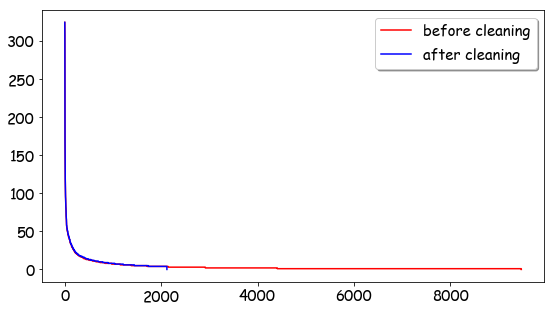

In [149]:
Plot_Keyword_Occurences.sort(key= lambda x:x[1], reverse=True)
y = [i[1] for i in Plot_Keyword_Occurences]
x = [k for k,i in enumerate(Plot_Keyword_Occurences)]
new_y = [i[1] for i in new_keyword_occurences]
new_x = [k for k,i in enumerate(new_keyword_occurences)]

f, ax = plt.subplots(figsize=(9, 5))
ax.plot(x, y, 'r-', label='before cleaning')
ax.plot(new_x, new_y, 'b-', label='after cleaning')
legend = ax.legend(loc='upper right', shadow=True)
plt.show()

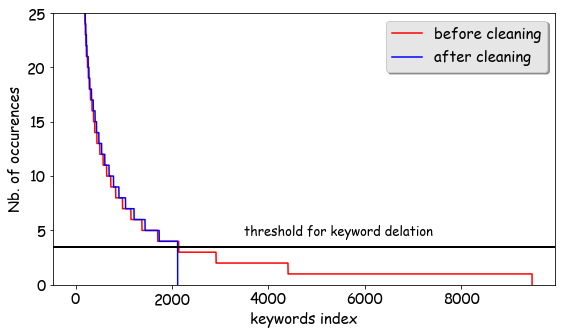

In [150]:
Plot_Keyword_Occurences.sort(key= lambda x:x[1], reverse=True)
y = [i[1] for i in Plot_Keyword_Occurences]
x = [k for k,i in enumerate(Plot_Keyword_Occurences)]
new_y = [i[1] for i in new_keyword_occurences]
new_x = [k for k,i in enumerate(new_keyword_occurences)]

f, ax = plt.subplots(figsize=(9, 5))
ax.plot(x, y, 'r-', label='before cleaning')
ax.plot(new_x, new_y, 'b-', label='after cleaning')
legend = ax.legend(loc='upper right', shadow=True)
frame = legend.get_frame()
frame.set_facecolor('0.90')
for label in legend.get_texts():
    label.set_fontsize('medium')
            
plt.ylim((0,25))
plt.axhline(y=3.5, linewidth=2, color = 'k')
plt.xlabel("keywords index", family='fantasy', fontsize = 15)
plt.ylabel("Nb. of occurences", family='fantasy', fontsize = 15)
#plt.suptitle("Nombre d'occurences des mots clés", fontsize = 18, family='fantasy')
plt.text(3500, 4.5, 'threshold for keyword delation', fontsize = 13)
plt.show()

In [154]:
#f,ax = plt.subplots(figsize =(12,9))
corr_mat = df_keywords_occurence.dropna(how='any')
corr_mat.shape

(1461, 28)

In [156]:
df_keywords_occurence.shape

(4803, 28)

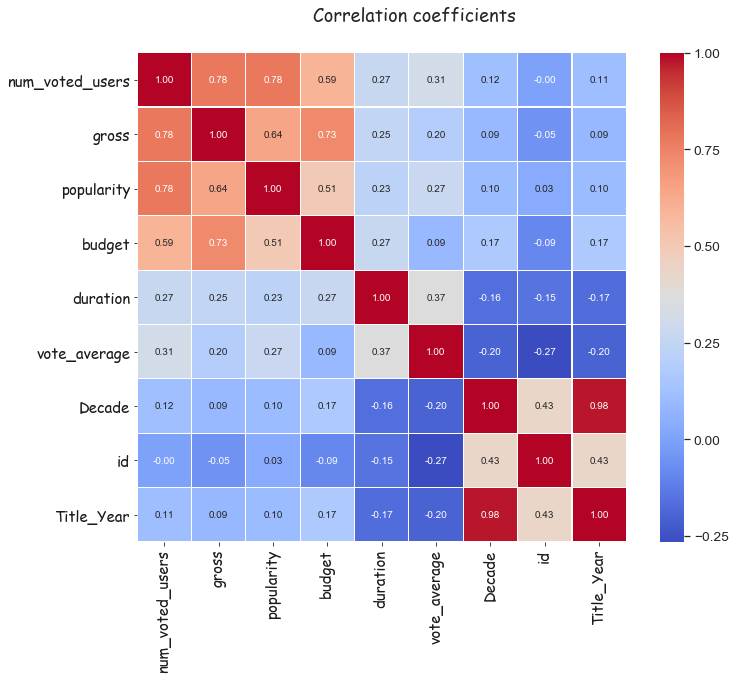

In [160]:
f,ax = plt.subplots(figsize =(12,9))
corrmat = df_keywords_occurence.dropna(how='any').corr()
k =17
cols = corrmat.nlargest(k, 'num_voted_users')['num_voted_users'].index
cm = np.corrcoef(df_keywords_occurence[cols].dropna(how='any').values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, linewidth = 0.1, cmap = 'coolwarm',
                 yticklabels=cols.values, xticklabels=cols.values)
f.text(0.5, 0.93, "Correlation coefficients", ha='center', fontsize = 18, family='fantasy')
plt.show()

In [161]:
corrmat

,budget,id,popularity,gross,duration,vote_average,num_voted_users,Title_Year,Decade
budget,1.000000,-0.050970,0.448053,0.742279,0.365376,0.082434,0.598595,0.152789,0.142890
id,-0.050970,1.000000,0.105671,-0.037903,-0.065308,-0.154606,0.018327,0.485462,0.463834
popularity,0.448053,0.105671,1.000000,0.589738,0.291228,0.303555,0.716833,0.042539,0.035954
gross,0.742279,-0.037903,0.589738,1.000000,0.381169,0.253184,0.781521,0.011292,0.010633
duration,0.365376,-0.065308,0.291228,0.381169,1.000000,0.408415,0.442173,-0.093389,-0.096783
vote_average,0.082434,-0.154606,0.303555,0.253184,0.408415,1.000000,0.432256,-0.197128,-0.191939
num_voted_users,0.598595,0.018327,0.716833,0.781521,0.442173,0.432256,1.000000,0.016727,0.023754
Title_Year,0.152789,0.485462,0.042539,0.011292,-0.093389,-0.197128,0.016727,1.000000,0.945997
Decade,0.142890,0.463834,0.035954,0.010633,-0.096783,-0.191939,0.023754,0.945997,1.000000


In [162]:
cols

Index(['num_voted_users', 'gross', 'popularity', 'budget', 'duration',
       'vote_average', 'Decade', 'id', 'Title_Year'],
      dtype='object')

In [163]:
cm

array([[ 1.        ,  0.7814496 ,  0.77808146,  0.59310217,  0.27203619,
         0.31369277,  0.11944462, -0.00278458,  0.1144768 ],
       [ 0.7814496 ,  1.        ,  0.64465396,  0.73078121,  0.25118753,
         0.1972911 ,  0.09187571, -0.04943565,  0.09042834],
       [ 0.77808146,  0.64465396,  1.        ,  0.50529672,  0.22537244,
         0.27421225,  0.10274731,  0.03299667,  0.10230762],
       [ 0.59310217,  0.73078121,  0.50529672,  1.        ,  0.26979175,
         0.09222447,  0.16786938, -0.08834522,  0.16926012],
       [ 0.27203619,  0.25118753,  0.22537244,  0.26979175,  1.        ,
         0.37188793, -0.16499114, -0.1504965 , -0.16684882],
       [ 0.31369277,  0.1972911 ,  0.27421225,  0.09222447,  0.37188793,
         1.        , -0.1975382 , -0.26539873, -0.19823999],
       [ 0.11944462,  0.09187571,  0.10274731,  0.16786938, -0.16499114,
        -0.1975382 ,  1.        ,  0.43156686,  0.97563137],
       [-0.00278458, -0.04943565,  0.03299667, -0.08834522, -0

In [164]:
df_var_cleaned = df_keywords_occurence.copy(deep = True)

In [168]:
missing_df = df_var_cleaned.isnull().sum(axis =0).reset_index()
missing_df.columns = ['Column Name','Missing Count']


In [170]:
missing_df['filling_factor'] = (df_var_cleaned.shape[0] 
                                - missing_df['Missing Count']) / df_var_cleaned.shape[0] * 100
missing_df = missing_df.sort_values('filling_factor').reset_index(drop = True)
missing_df

,Column Name,Missing Count,filling_factor
0,homepage,3091,35.644389
1,tagline,844,82.427649
2,Country,174,96.377264
3,Actor_3,93,98.063710
4,Language,86,98.209452
5,Actor_2,63,98.688320
6,Actor_1,53,98.896523
7,Director,30,99.375390
8,overview,3,99.937539
9,duration,2,99.958359


In [171]:
df_filling = df_var_cleaned.copy(deep=True)

In [172]:
missing_year_inf = df_filling[df_filling['Title_Year'].isnull()][['Director','Actor_1','Actor_2','Actor_3']]

In [173]:
missing_year_inf

,Director,Actor_1,Actor_2,Actor_3
4553,NaN,NaN,NaN,NaN


In [174]:
df_filling.iloc[4553]

budget                                                                  0
genres                                                                   
homepage                                                              NaN
id                                                                 380097
plot_keywords                                                            
language                                                               en
original_title                                 America Is Still the Place
overview                1971 post civil rights San Francisco seemed li...
popularity                                                              0
production_companies                                                   []
production_countries                                                   []
release_date                                                          NaT
gross                                                                   0
duration                              

In [175]:
col = ['Director','Actor_1','Actor_2','Actor_3']

In [176]:
usual_year = [0 for _ in range(4)]

In [177]:
usual_year

[0, 0, 0, 0]

In [179]:
var  = [0 for _ in range(4)]

In [181]:
for i in range(4):
        usual_year[i] = df_filling.groupby(col[i])['Title_Year'].mean()

In [183]:
usual_year[1]

Actor_1
A.J. Buckley         2010.000000
A.J. Cook            2003.000000
Aaliyah              2001.000000
Aaran Thomas         2007.000000
Aaron Eckhart        2006.555556
Aaron Ruell          2004.000000
Abbey Lincoln        1964.000000
Abbie Cornish        2009.666667
Abhishek Bachchan    2009.000000
Abigail Breslin      2012.000000
Adam Beach           2004.000000
Adam Brody           2010.000000
Adam Campbell        2006.500000
Adam G. Sevani       2010.000000
Adam Garcia          2002.666667
Adam Lamberg         2003.000000
Adam Pascal          2005.000000
Adam Sandler         2014.000000
Adam Scott           2010.000000
Adam Trese           2011.000000
Adar Beck            2009.000000
Adil Koukouh         2014.000000
Adolph Davis         2003.000000
Adrian Dunbar        2007.000000
Adrian Gaeta         2016.000000
Adrian Grenier       2001.000000
Adrian James         2015.000000
Adriano Giannini     2002.000000
Adrien Brody         2004.750000
Adrienne Barbeau     1982.000000
  

In [184]:
actor_year = dict()

In [185]:
 for i in range(4):
        for s in usual_year[i].index:
            if s in actor_year.keys():
                if pd.notnull(usual_year[i][s]) and pd.notnull(actor_year[s]):
                    actor_year[s] = (actor_year[s] + usual_year[i][s])/2
                elif pd.isnull(actor_year[s]):
                    actor_year[s] = usual_year[i][s]
            else:
                actor_year[s] = usual_year[i][s]

In [187]:
missing_year_info = df_filling[df_filling['Title_Year'].isnull()]

In [191]:
icount_replaced = 0
for index, row in missing_year_info.iterrows():
    value = [ np.NaN for _ in range(4)]
    icount = 0 ; sum_year = 0
    for i in range(4):            
        var[i] = df_filling.loc[index][col[i]]
        if pd.notnull(var[i]): value[i] = actor_year[var[i]]
        if pd.notnull(value[i]): icount += 1 ; sum_year += actor_year[var[i]]
        if icount != 0: sum_year = sum_year / icount 

        if int(sum_year) > 0:
            icount_replaced += 1
            df.set_value(index, 'title_year', int(sum_year))
            if icount_replaced < 10: 
                print("{:<45} -> {:<20}".format(df_filling.loc[index]['movie_title'],int(sum_year)))

In [192]:
icount = 0
for index, row in df_filling[df_filling['plot_keywords'].isnull()].iterrows():
    icount += 1
    liste_mot = row['movie_title'].strip().split()
    new_keyword = []
    for s in liste_mot:
        lemma = get_synonymes(s)
        for t in list(lemma):
            if t in keywords: 
                new_keyword.append(t)                
    if new_keyword and icount < 15: 
        print('{:<50} -> {:<30}'.format(row['movie_title'], str(new_keyword)))
    if new_keyword:
        df_filling.set_value(index, 'plot_keywords', '|'.join(new_keyword))

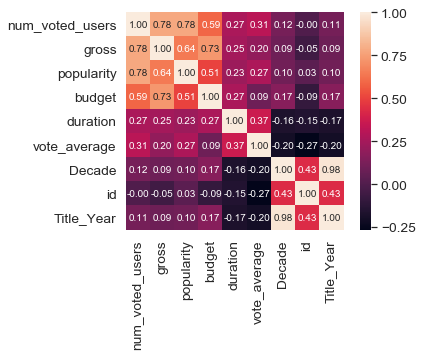

In [193]:
cols = corrmat.nlargest(9, 'num_voted_users')['num_voted_users'].index
cm = np.corrcoef(df_keywords_occurence[cols].dropna(how='any').values.T)
sns.set(font_scale=1.25)
hm = sns.heatmap(cm, cbar=True, annot=True, square=True,
                 fmt='.2f', annot_kws={'size': 10}, 
                 yticklabels=cols.values, xticklabels=cols.values)
plt.show()

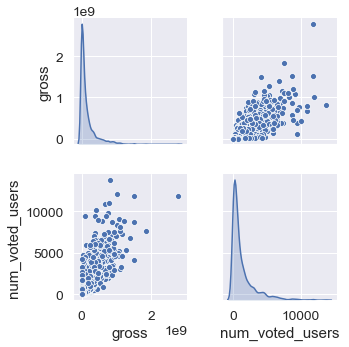

In [194]:
sns.set(font_scale=1.25)
cols = ['gross', 'num_voted_users']
sns.pairplot(df_filling.dropna(how='any')[cols],diag_kind='kde', size = 2.5)
plt.show();

In [195]:
regressor = linear_model.LinearRegression()

In [196]:
df_filling[['gross','num_voted_users']]

,gross,num_voted_users
0,2787965087,11800
1,961000000,4500
2,880674609,4466
3,1084939099,9106
4,284139100,2124
5,890871626,3576
6,591794936,3330
7,1405403694,6767
8,933959197,5293
9,873260194,7004


In [197]:
test = df_filling[['gross','num_voted_users']].dropna(how='any',axis =0)

In [198]:
test

,gross,num_voted_users
0,2787965087,11800
1,961000000,4500
2,880674609,4466
3,1084939099,9106
4,284139100,2124
5,890871626,3576
6,591794936,3330
7,1405403694,6767
8,933959197,5293
9,873260194,7004


In [199]:
X = np.array(test['gross'])

In [200]:
Y = np.array(test['num_voted_users'])

In [201]:
X = X.reshape(len(X),1)

In [202]:
X

array([[2787965087],
       [ 961000000],
       [ 880674609],
       ...,
       [         0],
       [         0],
       [         0]], dtype=int64)

In [203]:
Y = Y.reshape(len(Y),1)

In [204]:
Y

array([[11800],
       [ 4500],
       [ 4466],
       ...,
       [    6],
       [    7],
       [   16]], dtype=int64)

In [205]:
regressor.fit(X,Y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [208]:
test = df_filling[df_filling['gross'].isnull() & df_filling['num_voted_users'].notnull()]

In [209]:
test

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3,Decade


In [210]:
for index, row in test.iterrows():
        value = float(regressor.predict(row[ref_col]))
        df_filling.set_value(index, 'gross', value)

In [211]:
df_filling

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3,Decade
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space colony|society|spac...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,7.2,11800,2009.0,United States of America,English,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang,100.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård,100.0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|british...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes,110.0
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway,110.0
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe,110.0
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,5.9,3576,2007.0,United States of America,English,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church,100.0
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|music|princess|...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,7.4,3330,2010.0,United States of America,English,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman,110.0
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,7.3,6767,2015.0,United States of America,English,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans,110.0
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,7.4,5293,2009.0,United Kingdom,English,David Yates,Rupert Grint,Emma Watson,Tom Felton,100.0
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{'name': 'DC Comics', 'id': 429}, {'name': 'A...",...,5.7,7004,2016.0,United States of Am

In [212]:
df = df_filling.copy(deep=True)
df.reset_index(inplace = True, drop = True)

In [213]:
df

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3,Decade
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space colony|society|spac...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,7.2,11800,2009.0,United States of America,English,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang,100.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård,100.0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|british...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes,110.0
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway,110.0
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe,110.0
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,5.9,3576,2007.0,United States of America,English,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church,100.0
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|music|princess|...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,7.4,3330,2010.0,United States of America,English,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman,110.0
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,7.3,6767,2015.0,United States of America,English,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans,110.0
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,7.4,5293,2009.0,United Kingdom,English,David Yates,Rupert Grint,Emma Watson,Tom Felton,100.0
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{'name': 'DC Comics', 'id': 429}, {'name': 'A...",...,5.7,7004,2016.0,United States of Am

In [ ]:
Recommendation Engine

In [214]:
import math

In [215]:
gaussian_filter = lambda x,y,sigma :math.exp(-(x-y)**2/2*sigma**2)

In [221]:
def Entry_Variables(df,id_entry):
    col_labels = []
    if pd.notnull(df['Director'].iloc[id_entry]):
        for s in df['Director'].iloc[id_entry].split('|'):
            col_labels.append(s)
    for i in range(3):
        column = 'Actor_NUM'.replace('NUM',str(i+1))
        if pd.notnull(df[column].iloc[id_entry]):
            for s in  df[column].iloc[id_entry].split('|'):
                col_labels.append(s)
    if pd.notnull(df['plot_keywords'].iloc[id_entry]):
        for s in df['plot_keywords'].iloc[id_entry].split('|'):
            col_labels.append(s)
    return col_labels
    

In [219]:
for i in range(3):
    column ='Actor_NUM'.replace('NUM',str(i+1))

In [220]:
column

'Actor_3'

In [227]:
def Add_Variables(df, REF_VAR):    
    for s in REF_VAR: df[s] = pd.Series([0 for _ in range(len(df))])
    colonnes = ['genres', 'Actor_1', 'Actor_2',
                'Actor_3', 'Director', 'plot_keywords']
    for categorie in colonnes:
        for index, row in df.iterrows():
            if pd.isnull(row[categorie]): continue
            for s in row[categorie].split('|'):
                if s in REF_VAR: df.set_value(index, s, 1)            
    return df

In [342]:
def Recommand(df, id_entry):    
    df_copy = df.copy(deep = True)    
    liste_genres = set()
    for s in df['genres'].str.split('|').values:
        liste_genres = liste_genres.union(set(s))    
    variables = Entry_Variables(df_copy, id_entry)
    variables += list(liste_genres)
    df_new = Add_Variables(df_copy, variables)
    X = df_new.as_matrix(variables)
    nbrs = NearestNeighbors(n_neighbors=31, algorithm='auto', metric='euclidean').fit(X)

    distances, indices = nbrs.kneighbors(X)    
    xtest = df_new.iloc[id_entry].as_matrix(variables)
    xtest = xtest.reshape(1, -1)

    distances, indices = nbrs.kneighbors(xtest)

    return indices[0][:]

In [231]:
p = ['_' for _ in range(31)]

In [232]:
for index in p:
    print(index)

_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_
_


In [233]:
df

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3,Decade
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space colony|society|spac...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,7.2,11800,2009.0,United States of America,English,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang,100.0
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård,100.0
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|british...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes,110.0
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway,110.0
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe,110.0
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,5.9,3576,2007.0,United States of America,English,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church,100.0
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|music|princess|...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,7.4,3330,2010.0,United States of America,English,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman,110.0
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,7.3,6767,2015.0,United States of America,English,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans,110.0
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,7.4,5293,2009.0,United Kingdom,English,David Yates,Rupert Grint,Emma Watson,Tom Felton,100.0
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,en,Batman v Superman: Dawn of Justice,Fearing the actions of a god-like Super Hero l...,155.790452,"[{'name': 'DC Comics', 'id': 429}, {'name': 'A...",...,5.7,7004,2016.0,United States of Am

In [234]:
list_of_films = Recommand(df,12)

In [235]:
list_of_films
df['num_voted_users']

array([  12,    1,  199,   17,  340,   98,  208, 2390,  486,  262,  129,
        126,   24,  276, 4339,  206,   19,  315, 2490,   20,   46, 3351,
        107, 3251, 2655,  329,    9,    5,  103,   38,   23], dtype=int64)

In [320]:
df = df.drop(['Decade'],axis=1)

In [321]:
df

,budget,genres,homepage,id,plot_keywords,language,original_title,overview,popularity,production_companies,...,movie_title,vote_average,num_voted_users,Title_Year,Country,Language,Director,Actor_1,Actor_2,Actor_3
0,237000000,Action|Adventure|Fantasy|Science Fiction,http://www.avatarmovie.com/,19995,culture clash|future|space colony|society|spac...,en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{'name': 'Ingenious Film Partners', 'id': 289...",...,Avatar,7.2,11800,2009.0,United States of America,English,James Cameron,Zoe Saldana,Sigourney Weaver,Stephen Lang
1,300000000,Adventure|Fantasy|Action,http://disney.go.com/disneypictures/pirates/,285,ocean|drug abuse|exotic island|east india trad...,en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Pirates of the Caribbean: At World's End,6.9,4500,2007.0,United States of America,English,Gore Verbinski,Orlando Bloom,Keira Knightley,Stellan Skarsgård
2,245000000,Action|Adventure|Crime,http://www.sonypictures.com/movies/spectre/,206647,spy|based on novel|secret agent|sequel|british...,en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Spectre,6.3,4466,2015.0,United Kingdom,Français,Sam Mendes,Christoph Waltz,Léa Seydoux,Ralph Fiennes
3,250000000,Action|Crime|Drama|Thriller,http://www.thedarkknightrises.com/,49026,dc comics|crime fighter|terrorist|secret ident...,en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{'name': 'Legendary Pictures', 'id': 923}, {'...",...,The Dark Knight Rises,7.6,9106,2012.0,United States of America,English,Christopher Nolan,Michael Caine,Gary Oldman,Anne Hathaway
4,260000000,Action|Adventure|Science Fiction,http://movies.disney.com/john-carter,49529,based on novel|mars|medallion|space travel|pri...,en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{'name': 'Walt Disney Pictures', 'id': 2}]",...,John Carter,6.1,2124,2012.0,United States of America,English,Andrew Stanton,Lynn Collins,Samantha Morton,Willem Dafoe
5,258000000,Fantasy|Action|Adventure,http://www.sonypictures.com/movies/spider-man3/,559,dual identity|amnesia|sandstorm|love of one's ...,en,Spider-Man 3,The seemingly invincible Spider-Man goes up ag...,115.699814,"[{'name': 'Columbia Pictures', 'id': 5}, {'nam...",...,Spider-Man 3,5.9,3576,2007.0,United States of America,English,Sam Raimi,Kirsten Dunst,James Franco,Thomas Haden Church
6,260000000,Animation|Family,http://disney.go.com/disneypictures/tangled/,38757,hostage|magic|horse|fairy tale|music|princess|...,en,Tangled,When the kingdom's most wanted-and most charmi...,48.681969,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...",...,Tangled,7.4,3330,2010.0,United States of America,English,Byron Howard,Mandy Moore,Donna Murphy,Ron Perlman
7,280000000,Action|Adventure|Science Fiction,http://marvel.com/movies/movie/193/avengers_ag...,99861,marvel comic|sequel|superhero|based on comic b...,en,Avengers: Age of Ultron,When Tony Stark tries to jumpstart a dormant p...,134.279229,"[{'name': 'Marvel Studios', 'id': 420}, {'name...",...,Avengers: Age of Ultron,7.3,6767,2015.0,United States of America,English,Joss Whedon,Chris Hemsworth,Mark Ruffalo,Chris Evans
8,250000000,Adventure|Fantasy|Family,http://harrypotter.warnerbros.com/harrypottera...,767,witch|magic|broom|school of witchcraft|wizardr...,en,Harry Potter and the Half-Blood Prince,"As Harry begins his sixth year at Hogwarts, he...",98.885637,"[{'name': 'Warner Bros.', 'id': 6194}, {'name'...",...,Harry Potter and the Half-Blood Prince,7.4,5293,2009.0,United Kingdom,English,David Yates,Rupert Grint,Emma Watson,Tom Felton
9,250000000,Action|Adventure|Fantasy,http://www.batmanvsupermandawnofjustice.com/,209112,dc comics|vigilante|superhero|based on comic b...,en,Batman v Superman: Dawn of Justice,Fearing the actions of a go

In [322]:
df.columns

Index(['budget', 'genres', 'homepage', 'id', 'plot_keywords', 'language',
       'original_title', 'overview', 'popularity', 'production_companies',
       'production_countries', 'release_date', 'gross', 'duration',
       'spoken_languages', 'status', 'tagline', 'movie_title', 'vote_average',
       'num_voted_users', 'Title_Year', 'Country', 'Language', 'Director',
       'Actor_1', 'Actor_2', 'Actor_3'],
      dtype='object')

In [328]:
def Extract_parameters(df, list_films):     
    parameter_films = ['_' for _ in range(31)]
    i = 0
    max_users = -1
    for index in list_films:
        parameter_films[i] = list(df.iloc[index][['movie_title', 'Title_Year',
                                        'vote_average', 'popularity', 
                                        'num_voted_users']])
        parameter_films[i].append(index)
        max_users = max(max_users, parameter_films[i][4] )
        i += 1
        
    title_main = parameter_films[0][0]
    year  = parameter_films[0][1]
    parameter_films.sort(key = lambda x:criteria_selection(title_main, max_users,
                                    year, x[0], x[1], x[2], x[4]), reverse = True)

    return parameter_films 

In [324]:
max(-1,11800)

11800

In [327]:
def criteria_selection(title_main, max_users, annee_ref, titre, annee, imdb_score, votes):    
    if pd.notnull(annee_ref):
        feature_1 = gaussian_filter(annee_ref, annee, 20)
    else:
        feature_1 = 1        

    sigma = max_users * 1.0

    if pd.notnull(votes):
        feature_2 = gaussian_filter(votes, max_users, sigma)
    else:
        feature_2 = 0
        
    if sequel(title_main, titre):
        note = 0
    else:
        note = imdb_score**2 * feature_1* feature_2
    
    return note

In [326]:
def sequel(title_1, title_2):    
    if fuzz.ratio(title_1, title_2) > 50 or fuzz.token_set_ratio(title_1, title_2) > 50:
        return True
    else:
        return False

In [331]:
len(Extract_parameters(df,list_of_films))

31

In [337]:
Extract_parameters(df,list_of_films)[1][0]

"Pirates of the Caribbean: At World's End"

In [333]:
def add_to_selection(film_selection, parameter_films):    
    film_list = film_selection[:]
    icount = len(film_list)    
    for i in range(31):
        already_in_list = False
        for s in film_selection:
            if s[0] == parameter_films[i][0]: already_in_list = True
            if sequel(parameter_films[i][0], s[0]): already_in_list = True            
        if already_in_list: continue
        icount += 1
        if icount <= 5:
            film_list.append(parameter_films[i])
    return film_list

In [338]:
Extract_parameters(df,list_of_films)[1]

["Pirates of the Caribbean: At World's End", 2007.0, 6.9, 139.082615, 4500, 1]

## k2 = k1[:]

In [339]:
def remove_sequels(film_selection):    
    removed_from_selection = []
    for i, film_1 in enumerate(film_selection):
        for j, film_2 in enumerate(film_selection):
            if j <= i: continue 
            if sequel(film_1[0], film_2[0]): 
                last_film = film_2[0] if film_1[1] < film_2[1] else film_1[0]
                removed_from_selection.append(last_film)

    film_list = [film for film in film_selection if film[0] not in removed_from_selection]

    return film_list 

In [343]:
def find_similarities(df, id_entry, del_sequels = True, verbose = False):    
    if verbose: 
        print(90*'_' + '\n' + "QUERY: films similar to id={} -> '{}'".format(id_entry,
                                df.iloc[id_entry]['movie_title']))
    liste_films = Recommand(df, id_entry)
    parametres_films = extract_parameters(df, liste_films)
    film_selection = []
    film_selection = add_to_selection(film_selection, parametres_films)
    if del_sequels: film_selection = remove_sequels(film_selection)
    film_selection = add_to_selection(film_selection, parametres_films)
    selection_titles = []
    for i,s in enumerate(film_selection):
        selection_titles.append([s[0].replace(u'\xa0', u''), s[5]])
        if verbose: print("nº{:<2}     -> {:<30}".format(i+1, s[0]))

    return selection_titles

In [344]:
find_similarities(df, 12, del_sequels = False, verbose = True)

__________________________________________________________________________________________
QUERY: films similar to id=12 -> 'Pirates of the Caribbean: Dead Man's Chest'
nº1      -> Pirates of the Caribbean: Dead Man's Chest
nº2      -> Pirates of the Caribbean: At World's End
nº3      -> Pirates of the Caribbean: The Curse of the Black Pearl
nº4      -> Pirates of the Caribbean: On Stranger Tides
nº5      -> Cutthroat Island              


[["Pirates of the Caribbean: Dead Man's Chest", 12],
 ["Pirates of the Caribbean: At World's End", 1],
 ['Pirates of the Caribbean: The Curse of the Black Pearl', 199],
 ['Pirates of the Caribbean: On Stranger Tides', 17],
 ['Cutthroat Island', 340]]

In [346]:
find_similarities(df, 12, del_sequels = True, verbose = True)

__________________________________________________________________________________________
QUERY: films similar to id=12 -> 'Pirates of the Caribbean: Dead Man's Chest'
nº1      -> Pirates of the Caribbean: The Curse of the Black Pearl
nº2      -> Cutthroat Island              
nº3      -> The Hobbit: An Unexpected Journey
nº4      -> The 13th Warrior              
nº5      -> Red Sonja                     


[['Pirates of the Caribbean: The Curse of the Black Pearl', 199],
 ['Cutthroat Island', 340],
 ['The Hobbit: An Unexpected Journey', 98],
 ['The 13th Warrior', 208],
 ['Red Sonja', 2390]]

In [347]:
selection = dict()
for i in range(0, 20, 3):
    selection[i] = find_similarities(df, i, del_sequels = True, verbose = True)

__________________________________________________________________________________________
QUERY: films similar to id=0 -> 'Avatar'
nº1      -> Avatar                        
nº2      -> Star Trek Into Darkness       
nº3      -> Jupiter Ascending             
nº4      -> The Fifth Element             
nº5      -> Pirates of the Caribbean: On Stranger Tides
__________________________________________________________________________________________
QUERY: films similar to id=3 -> 'The Dark Knight Rises'
nº1      -> The Dark Knight               
nº2      -> Vantage Point                 
nº3      -> Batman & Robin                
nº4      -> Kick-Ass                      
nº5      -> Hitman                        
__________________________________________________________________________________________
QUERY: films similar to id=6 -> 'Tangled'
nº1      -> Up                            
nº2      -> Tangled                       
nº3      -> The Princess and the Frog     
nº4      -> Pony